# Import relevant Libraries

In [1]:
# Import Data Cleaning libraries Pandas and Numpy
import pandas as pd
import numpy as np

In [2]:
#Read the Trips Data Set and explore the data
df = pd.read_csv("TripsWithoutMissing.csv")
pd.options.display.max_columns = None
display(df.head())

,Unnamed: 0,hhld_num,pers_num,trip_num,trip_purp,start_time,mode_prime,trip_man_km,waterzn_orig,expf,age,sex,driver_lic,tran_pass,emp_stat,occupation,free_park,stu_stat,n_pers_trip,hh_dwell_type,hh_income,hh_size,hh_n_vehs
0,31273,100295,1,1,HBW,Peak,Drive,"(2.0, 3.0]",121187,40,"(41.0, 47.0]",F,Y,N,Employed,Retail&Service,Y,Not_student,"(0.999, 2.0]",House,40k-59k,"(4.0, 9.0]","(2.0, 99.0]"
1,33545,100295,1,2,HBW,Peak,Drive,"(2.0, 3.0]",120069,40,"(41.0, 47.0]",F,Y,N,Employed,Retail&Service,Y,Not_student,"(0.999, 2.0]",House,40k-59k,"(4.0, 9.0]","(2.0, 99.0]"
2,38854,100295,3,1,HBW,Off_peak,Drive,"(11.0, 16.0]",121187,40,"(10.999, 19.0]",F,Y,Other_agency,Employed,Retail&Service,Y,Student,"(3.0, 4.0]",House,40k-59k,"(4.0, 9.0]","(2.0, 99.0]"
3,38855,100295,3,2,HBW,Peak,Drive,"(11.0, 16.0]",120025,40,"(10.999, 19.0]",F,Y,Other_agency,Employed,Retail&Service,Y,Student,"(3.0, 4.0]",House,40k-59k,"(4.0, 9.0]","(2.0, 99.0]"
4,38856,100295,3,3,HBW,Peak,Drive,"(2.0, 3.0]",121187,40,"(10.999, 19.0]",F,Y,Other_agency,Employed,Retail&Service,Y,Student,"(3.0, 4.0]",House,40k-59k,"(4.0, 9.0]","(2.0, 99.0]"


# Categorical Variables conversion
## Ordinal Variables Conversion

In [3]:
#Import the Ordinal Encoder to encode the ordinal features
from sklearn.preprocessing import OrdinalEncoder

In [4]:
ordinal_bins = df[['age', 'n_pers_trip', 'hh_income', 'hh_size', 'hh_n_vehs' ]]

In [5]:
#Setup Encoder
encoder = OrdinalEncoder()
#Convert ordinal_bins into numpy array so it can be fed to the encoder
ordinal_bins = ordinal_bins.to_numpy()
#Fit and transform the data
result = encoder.fit_transform(ordinal_bins)
#Print the resulting numpy array
print(result, ordinal_bins)

[[4. 0. 2. 4. 3.]
 [4. 0. 2. 4. 3.]
 [0. 2. 2. 4. 3.]
 ...
 [4. 0. 1. 1. 1.]
 [6. 0. 1. 2. 0.]
 [6. 0. 1. 2. 0.]] [['(41.0, 47.0]' '(0.999, 2.0]' '40k-59k' '(4.0, 9.0]' '(2.0, 99.0]']
 ['(41.0, 47.0]' '(0.999, 2.0]' '40k-59k' '(4.0, 9.0]' '(2.0, 99.0]']
 ['(10.999, 19.0]' '(3.0, 4.0]' '40k-59k' '(4.0, 9.0]' '(2.0, 99.0]']
 ...
 ['(41.0, 47.0]' '(0.999, 2.0]' '15k-39k' '(1.0, 2.0]' '(0.0, 1.0]']
 ['(53.0, 58.0]' '(0.999, 2.0]' '15k-39k' '(2.0, 3.0]' '(-0.01, 0.0]']
 ['(53.0, 58.0]' '(0.999, 2.0]' '15k-39k' '(2.0, 3.0]' '(-0.01, 0.0]']]


In [6]:
#Convert the numpy array format ordinal features back into a data frame
ordinal_df = pd.DataFrame(data=result, columns = ['age', 'n_pers_trip', 'hh_income', 'hh_size', 'hh_n_vehs'])
ordinal_df

,age,n_pers_trip,hh_income,hh_size,hh_n_vehs
0,4.0,0.0,2.0,4.0,3.0
1,4.0,0.0,2.0,4.0,3.0
2,0.0,2.0,2.0,4.0,3.0
3,0.0,2.0,2.0,4.0,3.0
4,0.0,2.0,2.0,4.0,3.0
...,...,...,...,...,...
34603,8.0,0.0,3.0,1.0,2.0
34604,4.0,0.0,1.0,1.0,1.0
34605,4.0,0.0,1.0,1.0,1.0
34606,6.0,0.0,1.0,2.0,0.0


In [7]:
# Convert the trip in km to ordinal features
# Doing this feature seperately (and manually) as the encoder did not automatically sort the categories properly
trip_km = df[['trip_man_km']]
#list the category in proper order, this will be fed to the encoder
km = ['(-0.001, 1.0]', '(1.0, 2.0]', '(2.0, 3.0]', '(3.0, 4.0]', '(4.0, 5.0]', '(5.0, 6.0]', '(6.0, 8.0]', '(8.0, 11.0]','(11.0, 16.0]',  
       '(16.0, 56.0]',]
#fed the category into the encoder to show the order of the categories (in descending order)
ordi = OrdinalEncoder([km])
#fit and transform the data
result_km = ordi.fit_transform(trip_km)
#convert the resulting numpy array back into a dataframe
result_km = pd.DataFrame(data = result_km, columns = ['trip_man_km'])
#display the dataframe
result_km

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass categories=[['(-0.001, 1.0]', '(1.0, 2.0]', '(2.0, 3.0]', '(3.0, 4.0]', '(4.0, 5.0]', '(5.0, 6.0]', '(6.0, 8.0]', '(8.0, 11.0]', '(11.0, 16.0]', '(16.0, 56.0]']] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


,trip_man_km
0,2.0
1,2.0
2,8.0
3,8.0
4,2.0
...,...
34603,5.0
34604,8.0
34605,8.0
34606,8.0


## Nominal Variable Conversion

In [8]:
# Import the OneHotEncoder Class to encode the nominal encoder using the dummy variable method
from sklearn.preprocessing import OneHotEncoder

In [9]:
#Seperate the nominal features needeed to be encoded
nominal_df = df[['trip_purp', 'start_time', 'sex', 'driver_lic','tran_pass', 'emp_stat', 'occupation', 'free_park', 'stu_stat', 'hh_dwell_type', 'mode_prime']]

In [10]:
nominal_encoder = OneHotEncoder(drop='first', sparse=False)
# transform data
#Iterate through the nominal feature dataframe
for i in range(nominal_df.shape[1]):
    #Encode the feature in the current iteration cycle 
    onehot = nominal_encoder.fit_transform(nominal_df.iloc[:, i].to_numpy().reshape(-1, 1))
    #Save the current feature column
    nominal_col = nominal_df.iloc[:, i]
    #If first feature create a variable which will be added on when i != 0
    if i == 0:
        onehot_df = pd.DataFrame(data = onehot, columns = [i for i in nominal_col.unique()[:-1]] )
    else:
        onehot_df2 = pd.DataFrame(data = onehot, columns = [i for i in nominal_col.unique()[:-1]] )
        #Merge the df in this iteration cycle with the one formed in the zeroeth cycle (and concacted in the sunsequent cycles)
        onehot_df = pd.merge(onehot_df, onehot_df2, how='inner', left_index=True, right_index = True)
#Display the final encoded dataframe of the nominal dataframe
onehot_df

,HBW,HBD,Peak,F,Y_x,N,Other_agency,Employed,Not_employed_x,Retail&Service,Not_employed_y,General_Office,Y_y,Not Applicable,Not_student,House,Townhouse,Drive,Other,Passenger,Transit,Walk
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34603,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
34604,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
34605,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
34606,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [21]:
#Display all the unique values for each nominal feature
for i in range(nominal_df.shape[1]):
    x = [i for i in nominal_df.iloc[:,i].unique()[:]]
    print("{}:{}".format(nominal_df.columns[i], x))

trip_purp:['HBW', 'HBD', 'Non-HB']
start_time:['Peak', 'Off_peak']
sex:['F', 'M']
driver_lic:['Y', 'N']
tran_pass:['N', 'Other_agency', 'Y']
emp_stat:['Employed', 'Not_employed', 'Work_at_Home']
occupation:['Retail&Service', 'Not_employed', 'General_Office', 'Manufacturing']
free_park:['Y', 'Not Applicable', 'N']
stu_stat:['Not_student', 'Student']
hh_dwell_type:['House', 'Townhouse', 'Apartment']
mode_prime:['Drive', 'Other', 'Passenger', 'Transit', 'Walk', 'Bicycle']


# Joining all the transformed features

In [12]:
#Join all the nominal, ordinal and other relevant features in a single dataframe
df_final = df[['pers_num', 'trip_num']]
df_final = df_final.join(ordinal_df)
df_final = df_final.join(result_km)
df_final = df_final.join(onehot_df)
#Display the final dataframes
df_final

,pers_num,trip_num,age,n_pers_trip,hh_income,hh_size,hh_n_vehs,trip_man_km,HBW,HBD,Peak,F,Y_x,N,Other_agency,Employed,Not_employed_x,Retail&Service,Not_employed_y,General_Office,Y_y,Not Applicable,Not_student,House,Townhouse,Drive,Other,Passenger,Transit,Walk
0,1,1,4.0,0.0,2.0,4.0,3.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,2,4.0,0.0,2.0,4.0,3.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,1,0.0,2.0,2.0,4.0,3.0,8.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,2,0.0,2.0,2.0,4.0,3.0,8.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3,3,0.0,2.0,2.0,4.0,3.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34603,1,1,8.0,0.0,3.0,1.0,2.0,5.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
34604,2,1,4.0,0.0,1.0,1.0,1.0,8.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
34605,2,2,4.0,0.0,1.0,1.0,1.0,8.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
34606,1,1,6.0,0.0,1.0,2.0,0.0,8.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [14]:
df_final.to_csv('catEncodedDataset.csv')

# Select Columns which have missing values in the real Dataset and randomly take away 5% datapoints

In [15]:
ix = [(row, col) for row in range(df.shape[0]) for col in range(11, df.shape[1])]
for row, col in random.sample(ix, int(round(.05*len(ix)))):
    df.iat[row, col] = None

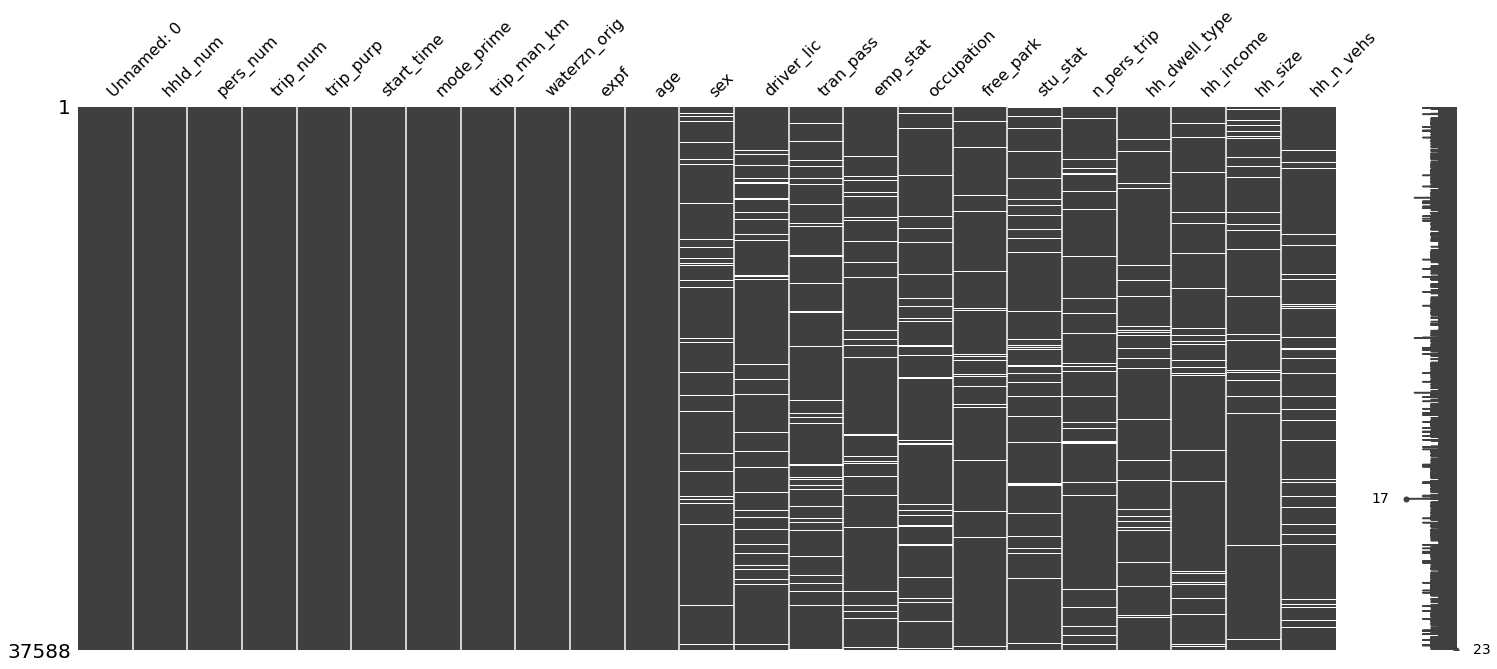

In [16]:
msno.matrix(df)

In [18]:
df

,Unnamed: 0,hhld_num,pers_num,trip_num,trip_purp,start_time,mode_prime,trip_man_km,waterzn_orig,expf,...,tran_pass,emp_stat,occupation,free_park,stu_stat,n_pers_trip,hh_dwell_type,hh_income,hh_size,hh_n_vehs
0,31273,100295,1,1,HBW,Peak,Drive,"(2.0, 3.0]",121187,40,...,N,Employed,None,Y,Not_student,"(0.999, 2.0]",House,40k-59k,None,"(2.0, 99.0]"
1,33545,100295,1,2,HBW,Peak,Drive,"(2.0, 3.0]",120069,40,...,N,Employed,Retail&Service,Y,Not_student,"(0.999, 2.0]",House,None,"(4.0, 9.0]",None
2,38854,100295,3,1,HBW,Off_peak,Drive,"(11.0, 16.0]",121187,40,...,Other_agency,Employed,Retail&Service,Y,Student,"(3.0, 4.0]",House,40k-59k,"(4.0, 9.0]","(2.0, 99.0]"
3,38855,100295,3,2,HBW,Peak,Drive,"(11.0, 16.0]",120025,40,...,Other_agency,Employed,None,Y,Student,"(3.0, 4.0]",House,40k-59k,"(4.0, 9.0]","(2.0, 99.0]"
4,38856,100295,3,3,HBW,Peak,Drive,"(2.0, 3.0]",121187,40,...,Other_agency,Employed,Retail&Service,Y,Student,"(3.0, 4.0]",House,None,"(4.0, 9.0]","(2.0, 99.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37583,43681,5508317,1,1,HBW,Peak,Drive,"(5.0, 6.0]",120674,16,...,N,Employed,General_Office,Y,Not_student,"(0.999, 2.0]",House,60k-99k,"(1.0, 2.0]","(1.0, 2.0]"
37584,6721,5508822,2,1,HBD,Peak,Passenger,"(11.0, 16.0]",121537,10,...,N,Not_employed,Not_employed,Not Applicable,Not_student,"(0.999, 2.0]",House,15k-39k,"(1.0, 2.0]","(0.0, 1.0]"
37585,6722,5508822,2,2,HBD,Peak,Passenger,"(11.0, 16.0]",120322,10,...,N,Not_employed,Not_employed,Not Applicable,Not_student,"(0.999, 2.0]",House,15k-39k,"(1.0, 2.0]","(0.0, 1.0]"
37586,2874,5508943,1,1,HBW,Peak,Passenger,"(11.0, 16.0]",120677,8,...,N,Employed,Manufacturing,Y,Not_student,"(0.999, 2.0]",House,15k-39k,"(2.0, 3.0]","(-0.01, 0.0]"
